

# Project: Investigate a Dataset (No Show Appointments  - 2021 )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, No-show appointments was used, in order to help analyze it and extract the benefit from it to obtain information that helps in re-improving the attending patients to their appointments.<br>
This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.

> We analyzed this data and extracted the benefit from it to answer the methodology of the questions asked Question that can analyised from this data set

<li> Does age have any effect on diabetes, and the percentage of patients attending appointments with this type of chronic disease ?  <br></li>
<li> A comparison between the percentage of ages who attend their appointments and the ages who do not commit to attending their appointments ? <br></li>

<li> Percentage of arrival and reminder of patients' appointments using SMS Message ?
 <br></li>
 
 
 > Several models were used in the process of data analysis and revision
I dealt with the panda in cleaning the data and dealt with the matplotlib in the process of showing the graphics to clarify the purpose of this study and analysis
The information appearance process was used to verify the type of data entered
I use the age equalization process greater than 0 to check that there is no lesser age
The missing information check function was used to show accurate results in the type of data entered





In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data = pd.read_csv('noshowappointments.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
data.shape

(110527, 14)



### Data Cleaning 
checking for cleanliness, and then trim and clean the dataset for analysis.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [14]:
data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [15]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [17]:
data=data.drop(['PatientId','Alcoholism'], axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [20]:
# converting columns from date to a datetime datatype
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [22]:
# we fix any age has 0 or less values 
# in the data (there is no patient has the exactly the age 0 or less)
meanAge = data['Age'].mean()
data[data['Age'] <= 0] = meanAge

In [79]:
## data.No-show[data['No-show'] == 'Yes'] = 1
## data.No-show[data['No-show'] == 'No'] = 0
## data['No-show']= pd.to_numeric(data['No-show'])

In [68]:
# create a mask for people who came
showed = data['No-show'] == 0
not_showed = data['No-show'] == 1
data['showed'] = showed
data['no-showed'] = not_showed
showed= data[data['No-show']== 'Yes']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

> At this stage, we analyzed the data and extracted the benefits from it in order to be applicable and useful in extracting the problems that make patients not attend their appointments.

### Research Question 1 ( Does age have any effect on diabetes, and the percentage of patients attending appointments with this type of chronic disease ?  )

Text(0.5, 1.0, 'Age VS Diabetes')

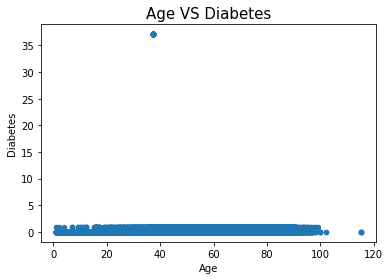

In [123]:
data.plot(x='Age', y='Diabetes', kind='scatter').set_title("Age VS Diabetes",size=15)

> We note that the percentage of diabetes and the age difference are very close, and that it is a chronic disease for all ages, and this includes the fact that the percentage of diabetes appointments is attended on a continuous basis, due to the percentage of this disease in all ages

### Research Question 2  (A comparison between the percentage of ages who attend their appointments and the ages who do not commit to attending their appointments)

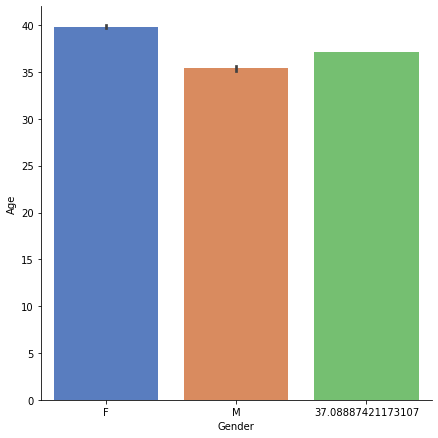

In [125]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


sns.catplot(x="Gender", y="Age",  data=new_appt, height=6, kind="bar", palette="muted", )

> We note that the percentage of adherence to appointments exceeds men more than women and they are more eager to attend appointments

### Research Question 3 (Percentage of arrival and reminder of patients' appointments using SMS Message)

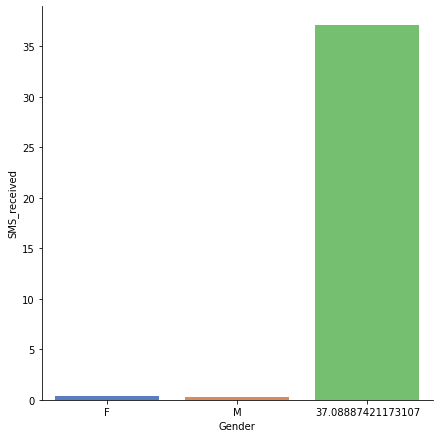

In [100]:
##NoShowBy2Vars(No-Show_data,'Gender' ,'SMS_received')

sns.catplot(x="Gender", y="SMS_received", data=new_appt, height=6, kind="bar", palette="muted", )


> We note here that the percentage of messages reaching patients' phones for men and women is equal, and this is evidence of patients' awareness in filling out registration forms correctly and making the message a title in the appointment reminder, and it may be taken into account in reminding patients of appointments

### Limitations:
there we some illogical data such as patients with age 0 or less

<a id='conclusions'></a>
## Conclusions
> In the end, this file displays information about booking appointments in Brazilian hospitals, the percentage of patients attending these appointments, and what are the obstacles that direct patients to attend these appointments, or what are the reasons why patients do not attend? <br>

> In conclusion, we limited the percentage of attending appointments for women and men, and what is the largest percentage of attendance for their appointments, and it became clear to us here that the percentage of attending appointments among men is more commitment than women. Young people, and it became clear to us that the percentage of middle-aged people are more eager to attend appointments.<br>

> We discussed the percentage of appointment reminders using text messages, and who used these text messages the most when they reached the mobile phone to allow appointment reminders, and the ratios between men and women were close to a point.